In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [2]:
sns.set(rc={"figure.figsize": (15, 7)})
sns.set_style("whitegrid", {"axes.grid": False})
sns.set_context("notebook")  # "talk", "notebook"

In [3]:
cancer_df = pd.read_csv("breast_cancer.csv", sep=",")

In [4]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
cancer_df.groupby('diagnosis').id.count()

diagnosis
B    357
M    212
Name: id, dtype: int64

In [7]:
final_df = cancer_df.iloc[:,1:12]
features_df = final_df.drop('diagnosis', axis=1)

### Question 1: Are the cell nucleus features are different in the situation of benign and malignant breast cancer?

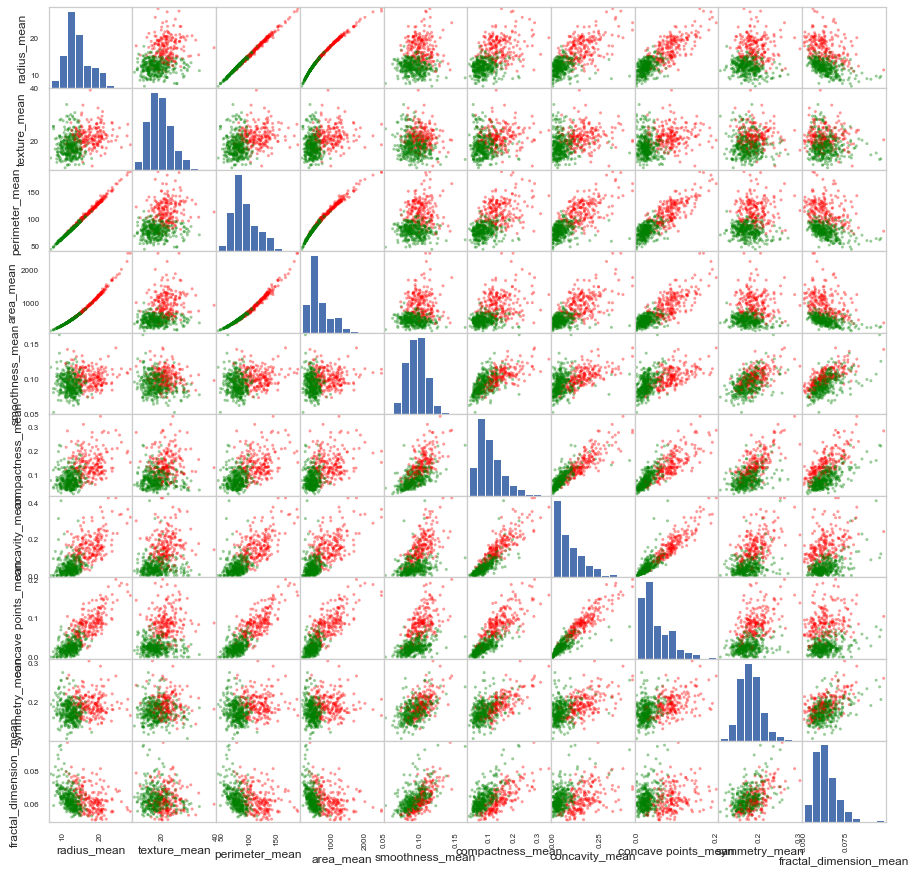

In [10]:
colors_dict = {'M':'red', 'B':'green'}
colors = final_df['diagnosis'].map(lambda x: colors_dict.get(x))
sm = scatter_matrix(features_df, c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

### Question 2: How well can we predict the malignancy using the LogisticRegression and the RandomForest algorithms?

In [30]:
[col[:-5] for col in features_df.columns]

['radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave points',
 'symmetry',
 'fractal_dimension']

In [31]:
# Get class
Y = cancer_df['diagnosis']

# Get the features
feature_list = list([col[:-5] for col in features_df.columns])
features_df.columns = feature_list
X = features_df

In [32]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print('train_X Shape:', train_X.shape)
print('train_Y Shape:', train_Y.shape)
print('test_X Shape:', test_X.shape)
print('test_Y Shape:', test_Y.shape)
accuracy_all = []
cvs_all = []

train_X Shape: (398, 10)
train_Y Shape: (398,)
test_X Shape: (171, 10)
test_Y Shape: (171,)


In [33]:
#baseline
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, Y)
dummy_clf.score(X, Y)

0.5272407732864675

In [34]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# define the model
model_rf = RandomForestClassifier(n_estimators = 200, min_samples_leaf=3)
model_rf.fit(train_X, train_Y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
n_scores = cross_val_score(model_rf, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
pred_Y = model_rf.predict(test_X)


accuracy_all.append(accuracy_score(pred_Y, test_Y))
cvs_all.append(np.mean(n_scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(pred_Y, test_Y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(n_scores), np.std(n_scores)*2))

Random Forest Accuracy: 95.32%
Cross validation score: 92.97% (+/- 5.91%)


In [35]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state = 0)
model_lr.fit(train_X, train_Y)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
n_scores = cross_val_score(model_lr, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
pred_Y = model_lr.predict(test_X)


accuracy_all.append(accuracy_score(pred_Y, test_Y))
cvs_all.append(np.mean(n_scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(pred_Y, test_Y)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(n_scores), np.std(n_scores)*2))

Random Forest Accuracy: 93.57%
Cross validation score: 90.75% (+/- 5.38%)


/Users/ziyuan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
d = {'accuracy_all':accuracy_all, 
     'cvs_all':cvs_all}
index = ['RandomForest', 'LogisticRegression']
df = pd.DataFrame(d, index=index)
df

,accuracy_all,cvs_all
RandomForest,0.953216,0.929700
LogisticRegression,0.935673,0.907545


### Question 3: What are features that can influence the class the most?

In [37]:
# Get numerical feature importances
importances = list(model_rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for X, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: concave points       Importance: 0.34
Variable: perimeter            Importance: 0.15
Variable: concavity            Importance: 0.15
Variable: area                 Importance: 0.12
Variable: radius               Importance: 0.1
Variable: texture              Importance: 0.06
Variable: compactness          Importance: 0.04
Variable: smoothness           Importance: 0.02
Variable: symmetry             Importance: 0.01
Variable: fractal_dimension    Importance: 0.01


In [38]:
feature_importances[0]

('concave points', 0.34)

<AxesSubplot:>

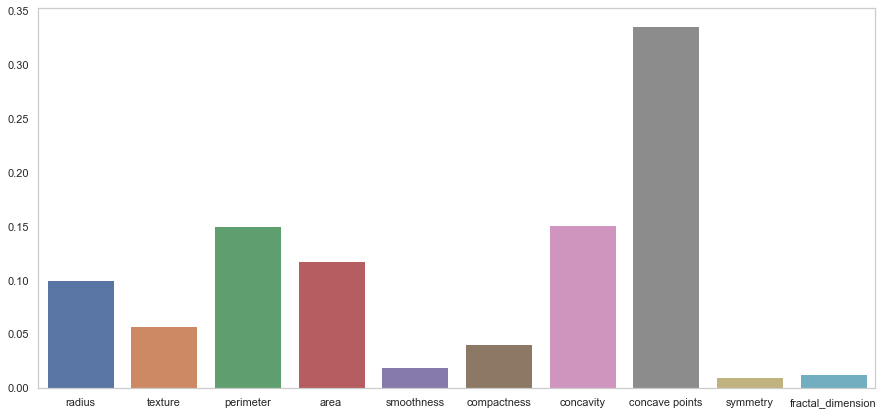

In [39]:
sns.barplot(x=feature_list, y=importances)